<a href="https://colab.research.google.com/github/ramakalidass2/customer-segmentation-kmeans/blob/main/Customer_Segmentation_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Silhouette Score: 0.27191023466188324


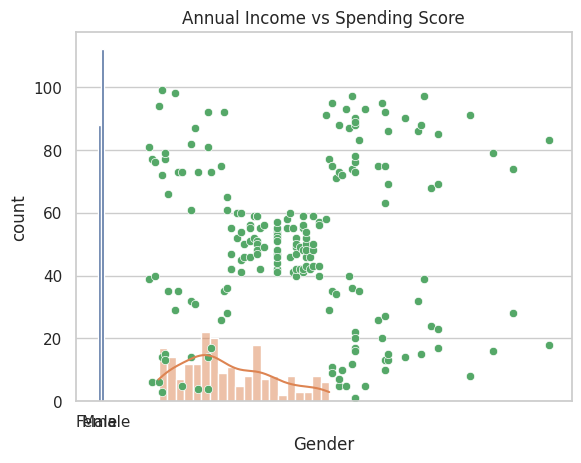

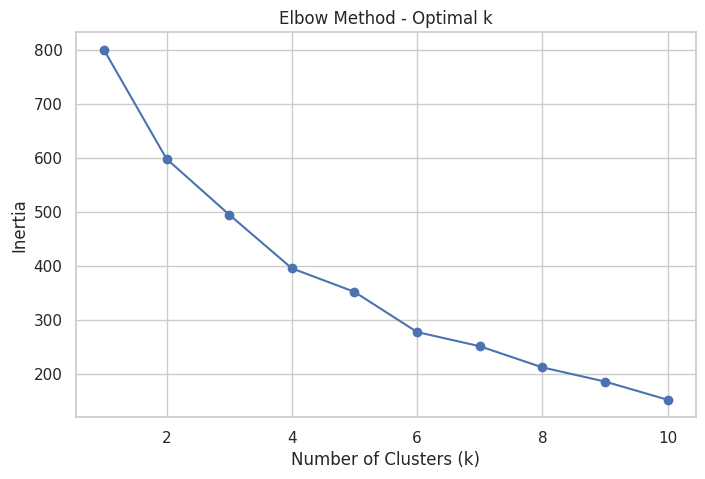

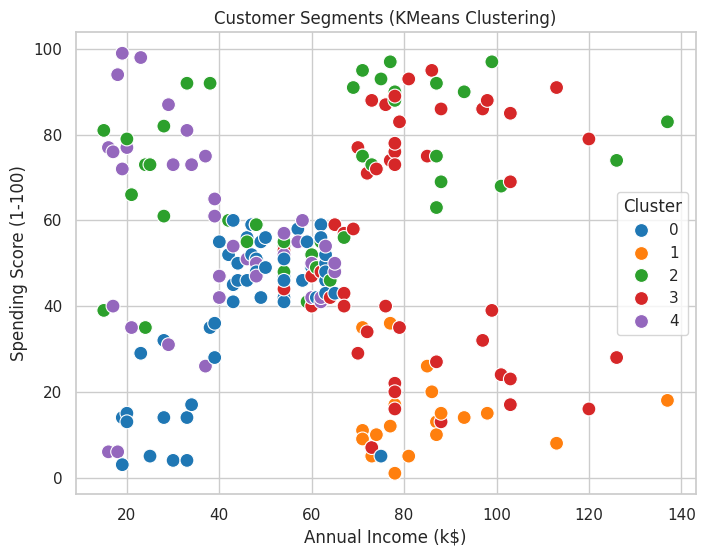

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import requests # Import the requests library for downloading

sns.set(style="whitegrid")

# Load csv from github directly
url = "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()
print("Shape:", df.shape)
df.info()
df.describe()
df.isnull().sum()


# Drop CustomerID (not useful for clustering)
df.drop('CustomerID', axis=1, inplace=True)

#Visual EDA (Exploratory Data Analysis)
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

# Age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

# Income vs Spending Score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Annual Income vs Spending Score")

# Convert Gender to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select features
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Elbow Method to Find Optimal Clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method - Optimal k")

#Apply KMeans with Chosen k(here k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['Cluster'] = clusters

#Visualize Customer Segments
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='tab10', s=100)
plt.title("Customer Segments (KMeans Clustering)")

#Evaluate Clustering with Silhouette Score
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)
